# BANK CUSTOMER CHURN PERDICTION 

### Customer churn refers to the phenomenon of clients leaving a bank or financial institution. 

I import the required libraries for my Project

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
import joblib

Load the dataset with help of pandas 

In [2]:
churn_data = pd.read_csv("Churn_Modelling.csv")

## Data Cleaning

In [3]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1,0


identify and remove duplicates rows 

In [4]:
duplicates = churn_data[churn_data.duplicated()]
print("----------------------------------------")
print("Duplicates rows:")
print(duplicates)
print("----------------------------------------")

----------------------------------------
Duplicates rows:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
----------------------------------------


Remove any data that is not useful for your analysis.

In this dataset 3 columns are not need for performing analysis.

i.e. owNumber, CustomerId, Surname

In [5]:
churn_data = churn_data.drop(["RowNumber", "CustomerId", "Surname"],axis=1)

In [6]:
print(churn_data.head())

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0     2.0       0.00            1.0   
1          608     Spain  Female  41.0     1.0   83807.86            1.0   
2          502    France  Female  42.0     8.0  159660.80            3.0   
3          699    France  Female  39.0     1.0       0.00            2.0   
4          850     Spain  Female  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember EstimatedSalary  Exited  
0        1.0             1.0       101348.88       1  
1        0.0             1.0       112542.58       0  
2        1.0             0.0       113931.57       1  
3        0.0             0.0        93826.63       0  
4        1.0             1.0         79084.1       0  


Check missing values for dataset

In [7]:
churn_data.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                46
Tenure             21
Balance            38
NumOfProducts      24
HasCrCard          34
IsActiveMember     19
EstimatedSalary    73
Exited              0
dtype: int64

In [8]:
churn_data.dropna(subset=["Age"],axis=0,inplace=True)

In [9]:
churn_data["Tenure"] = churn_data["Tenure"].fillna(churn_data["Tenure"].mean())

In [10]:
churn_data["Balance"] = churn_data["Balance"].fillna(churn_data["Balance"].mean())

In [11]:
churn_data.dropna(subset=["NumOfProducts"],axis=0,inplace=True)

In [12]:
churn_data.dropna(subset=["HasCrCard"],axis=0,inplace=True)

In [13]:
churn_data["IsActiveMember"] = churn_data["IsActiveMember"].fillna(churn_data["IsActiveMember"].mean())

In [14]:
churn_data.dropna(subset=["EstimatedSalary"],axis=0,inplace=True)

In [15]:
churn_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
churn_data.reindex()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1


Convert the categorical variables into numerical variable 

In [17]:
Label = LabelEncoder()
Label

LabelEncoder()

In [18]:
churn_data["Geography"] = Label.fit_transform(churn_data["Geography"])
print("----------------------------------------")
print(churn_data["Geography"].head())
print("----------------------------------------")

----------------------------------------
0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64
----------------------------------------


In [19]:
churn_data["Gender"] = Label.fit_transform(churn_data["Gender"])
print("--------------------------------------------------")
print(churn_data["Gender"].head())
print("--------------------------------------------------")

--------------------------------------------------
0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64
--------------------------------------------------


In [20]:
churn_data["EstimatedSalary"] = Label.fit_transform(churn_data["EstimatedSalary"])
print("--------------------------------------------------")
print(churn_data["EstimatedSalary"].head())
print("--------------------------------------------------")

--------------------------------------------------
0      91
1     716
2     786
3    9495
4    8638
Name: EstimatedSalary, dtype: int64
--------------------------------------------------


## Data Exploration

In [21]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2.0,0.00,1.0,1.0,1.0,91,1
1,608,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,716,0
2,502,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,786,1
3,699,0,0,39.0,1.0,0.00,2.0,0.0,0.0,9495,0
4,850,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,8638,0


In [22]:
churn_data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39.0,5.0,0.00,2.0,1.0,0.0,9637,0
9996,516,0,1,35.0,10.0,57369.61,1.0,1.0,1.0,112,0
9997,709,0,0,36.0,7.0,0.00,1.0,0.0,1.0,6619,1
9998,772,1,1,42.0,3.0,75075.31,2.0,1.0,0.0,9426,1
9999,792,0,0,28.0,4.0,130142.79,1.0,1.0,0.0,6420,0


Display some basic information of dataset

In [23]:
print("---------------------------------")
print("Shape of DataSet")
print(churn_data.shape)
print("---------------------------------")
print("Size of DataSet")
print(churn_data.size)
print("---------------------------------")
print("Data type of DataSet")
print(churn_data.dtypes)
print("---------------------------------")
print("Columns of DataSet")
print(churn_data.columns)
print("---------------------------------")

---------------------------------
Shape of DataSet
(9823, 11)
---------------------------------
Size of DataSet
108053
---------------------------------
Data type of DataSet
CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary      int64
Exited               int64
dtype: object
---------------------------------
Columns of DataSet
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
---------------------------------


Get summary of dataset

In [24]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9823 non-null   int64  
 1   Geography        9823 non-null   int64  
 2   Gender           9823 non-null   int64  
 3   Age              9823 non-null   float64
 4   Tenure           9823 non-null   float64
 5   Balance          9823 non-null   float64
 6   NumOfProducts    9823 non-null   float64
 7   HasCrCard        9823 non-null   float64
 8   IsActiveMember   9823 non-null   float64
 9   EstimatedSalary  9823 non-null   int64  
 10  Exited           9823 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 920.9 KB


Get the statistic summary of dataset

In [25]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9823.0,650.539143,96.722283,350.0,584.0,652.00,717.500,850.00
Geography,9823.0,0.747124,0.827757,0.0,0.0,0.00,1.000,2.00
Gender,9823.0,0.546574,0.497851,0.0,0.0,1.00,1.000,1.00
Age,9823.0,38.919678,10.495161,18.0,32.0,37.00,44.000,92.00
Tenure,9823.0,5.016215,2.882841,0.0,3.0,5.00,7.000,10.00
Balance,9823.0,76315.336344,62333.484945,0.0,0.0,96759.42,127541.205,250898.09
NumOfProducts,9823.0,1.532017,0.582064,1.0,1.0,1.00,2.000,4.00
HasCrCard,9823.0,0.705284,0.455938,0.0,0.0,1.00,1.000,1.00
IsActiveMember,9823.0,0.516624,0.499265,0.0,0.0,1.00,1.000,1.00
EstimatedSalary,9823.0,4910.579456,2835.378093,0.0,2455.5,4911.00,7365.500,9821.00


Count values of traget variables

In [26]:
churn_data["Exited"].value_counts()

Exited
0    7820
1    2003
Name: count, dtype: int64

Draw countplot of traget variables

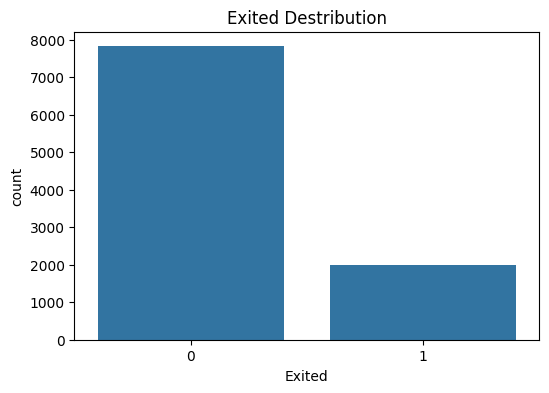

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x=churn_data["Exited"],data=churn_data)
plt.title("Exited Destribution")
plt.show()

Make list of continuous data then Drow the histogram of each features and boxplot of traget variable with their features with the help seaborn library 

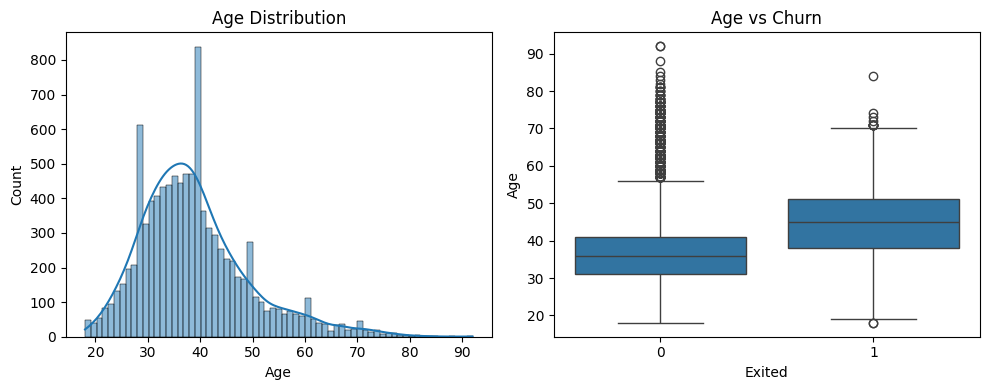

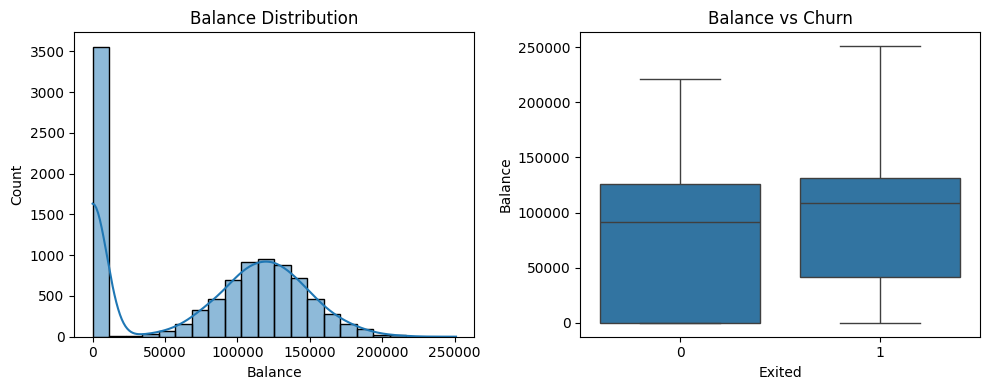

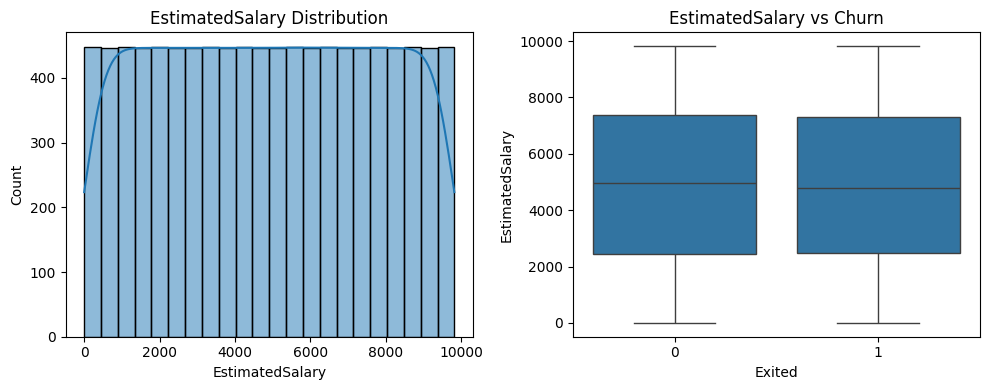

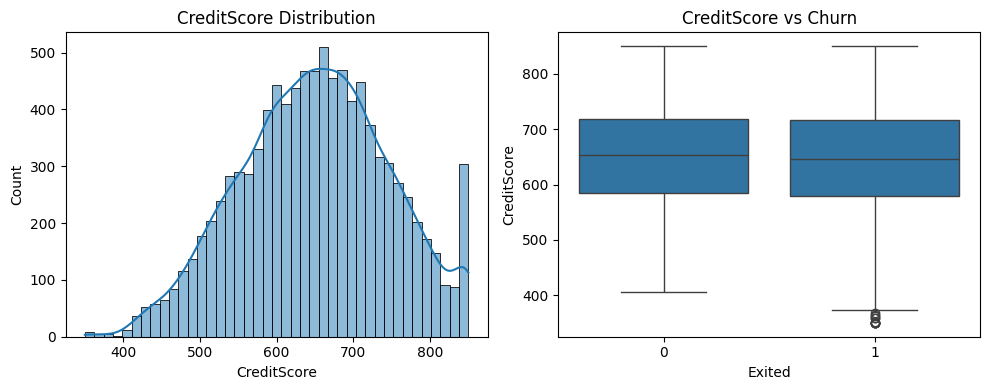

In [28]:
numerical_features = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']

for feature in numerical_features:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    sns.histplot(churn_data[feature], kde=True)
    plt.title(f'{feature} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=churn_data['Exited'], y=feature, data=churn_data)
    plt.title(f'{feature} vs Churn')
    
    plt.tight_layout()
    plt.show()


Make a list of Catagory data and Draw countplot of these features based on traget variable

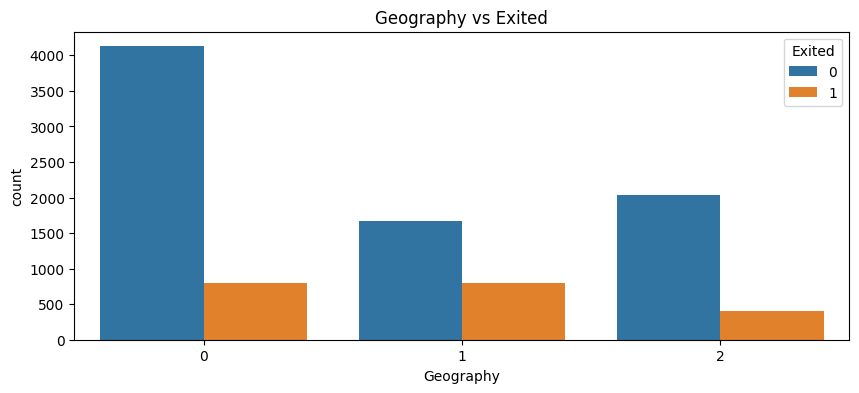

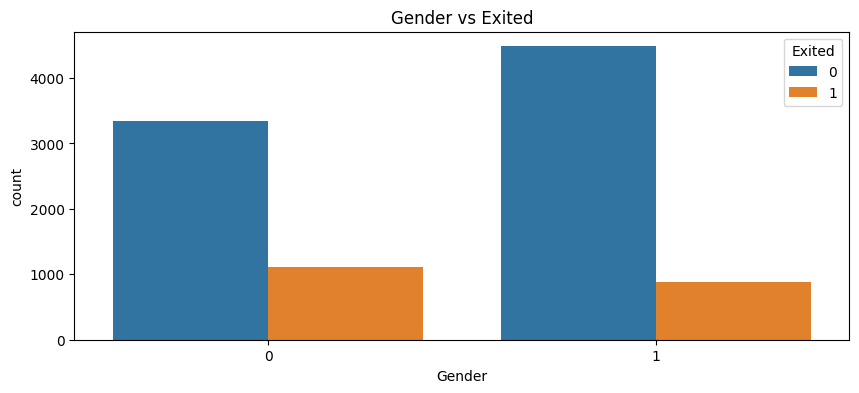

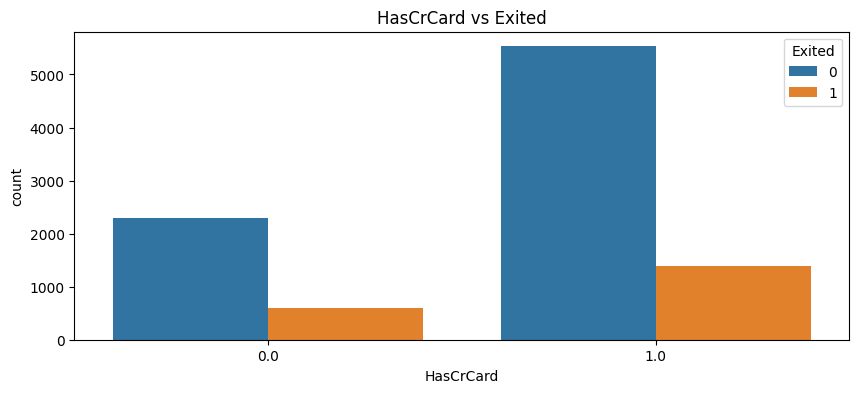

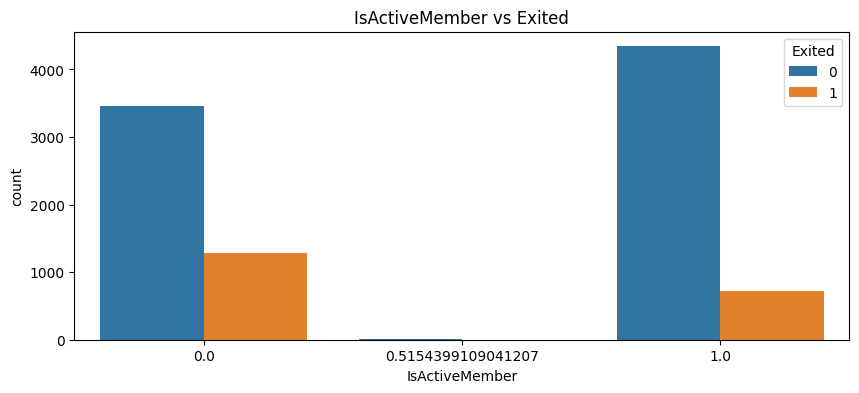

In [29]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature,hue=churn_data["Exited"],data=churn_data)
    plt.title(f"{feature} vs Exited")
    plt.show()

Draw heatmap of Dataset to understand the relationship between Variables

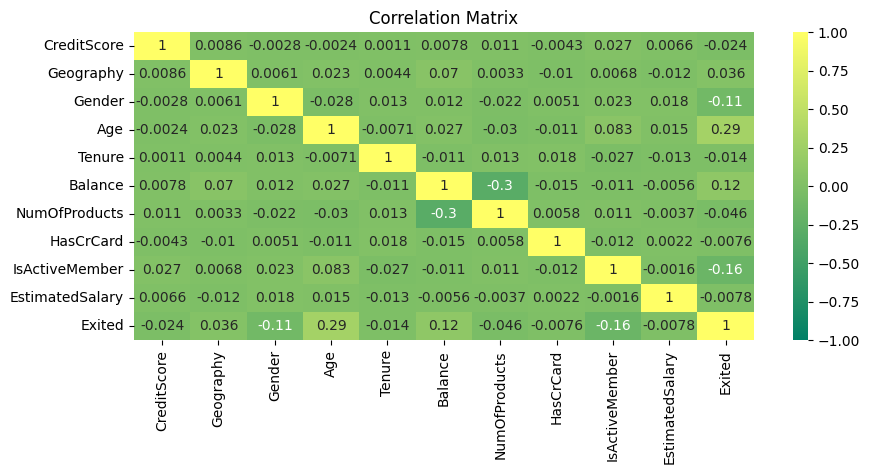

In [30]:
plt.figure(figsize=(10,4))
correlation = churn_data.corr()
sns.heatmap(correlation, annot=True, cmap='summer', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [31]:
x = churn_data.drop(["Exited"],axis=1)
y = churn_data["Exited"]

In [32]:
x.shape

(9823, 10)

In [33]:
y.shape

(9823,)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train.shape

(7858, 10)

In [36]:
y_train.shape

(7858,)

In [37]:
x_test.shape

(1965, 10)

In [38]:
y_test.shape

(1965,)

In [39]:
Scalar = StandardScaler()
Scalar

StandardScaler()

In [40]:
model = LogisticRegression()
model

LogisticRegression()

In [41]:
pipeline = make_pipeline(Scalar,model)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [42]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
y_pred = pipeline.predict(x_test)

In [44]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [45]:
coef = model.coef_
coef

array([[-0.05165993,  0.05949269, -0.26257319,  0.74985224, -0.02329608,
         0.29279611, -0.03367461,  0.00092002, -0.55918171, -0.02124829]])

In [46]:
intercept = model.intercept_
intercept

array([-1.63372813])

In [47]:
Accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [48]:
print("-------------------------------------")
print(f"Accuracy: \n {Accuracy}")
print("--------------------------------------")
print(f"Confusion metrix: \n {cm}")

-------------------------------------
Accuracy: 
 0.8091603053435115
--------------------------------------
Confusion metrix: 
 [[1516   41]
 [ 334   74]]


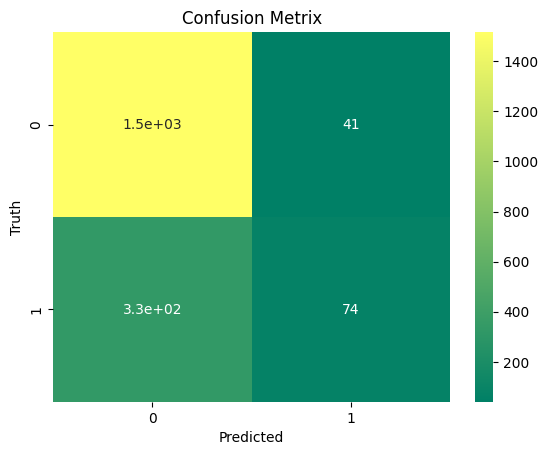

In [49]:
sns.heatmap(cm,annot=True,cmap="summer")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Metrix")
plt.show()

In [50]:
joblib.dump(pipeline,"Churn.joblib")

['Churn.joblib']

In [51]:
ab= np.array([[771,0,1,39.0,5.0,0.00,2.0,1.0,0.0,9637]])

In [52]:
model.predict(ab)

array([0])

In [53]:
import numpy as np
a = np.array([[619,	0,	0,	42.0,	2.0,	0.00,	1.0,	1.0,	1.0,	91]])


In [54]:
model.predict(a)

array([0])

In [55]:
cv= np.array([[502,	0,	0,	42.0,	8.0,	159660.80,	3.0,	1.0,	0.0,	786]])

In [56]:
model.predict(cv)

array([1])

In [57]:
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [72]:
churn_data["Geography"].value_counts()

Geography
0    4921
1    2465
2    2437
Name: count, dtype: int64

In [59]:
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')